In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('mental_health_dataset.csv',encoding= 'unicode_escape')

In [3]:
df.head

<bound method NDFrame.head of        Unnamed: 0                                        Description  \
0               0  I'm sorry about this post. It's gonna be a who...   
1               1  Been getting super high off high amounts of th...   
2               2  My brothers been shooting heroin/meth for the ...   
3               3  I rlly need an opinion cuz idk bout this stuff...   
4               4  Ive smoked weed since 8th grade in middle scho...   
...           ...                                                ...   
11736       11736  possible have satpathy ask question the questi...   
11737       11737                              god that was thorough   
11738       11738                      thread and meat kaun jat bhai   
11739       11739     not touch food with your left hand left handed   
11740       11740                     they say because they care for   

      Mental_State  
0        Addiction  
1        Addiction  
2        Addiction  
3        Addiction  


In [4]:
df.groupby("Mental_State").describe()

Unnamed: 0                                     \
                            count          mean         std      min   
Mental_State                                                           
Addiction                   998.0    498.500000  288.242086      0.0   
Alcoholism                  999.0   1497.000000  288.530761    998.0   
Anxiety                    1024.0   2508.500000  295.747640   1997.0   
Aspergers                   799.0   3516.000000  230.795725   3117.0   
Bipolar                    1024.0   4427.500000  295.747640   3916.0   
Borderline Personality     1024.0   5720.500000  295.747640   5209.0   
Depression                 1024.0   7018.500000  295.747640   6507.0   
Schizophernia              1024.0   8149.500000  295.747640   7638.0   
SelfHarm                    746.0   9144.857909  215.894415   8772.0   
Suidal Thought             1024.0  10030.500000  295.747640   9519.0   
neutral                    1024.0  11228.500000  295.747640  10717.0   

                                                              
                             25%      50%       75%      max  
Mental_State                                                  
Addiction                 249.25    498.5    747.75    997.0  
Alcoholism               1247.50   1497.0   1746.50   1996.0  
Anxiety                  2252.75   2508.5   2764.25   3020.0  
Aspergers                3316.50   3516.0   3715.50   3915.0  
Bipolar                  4171.75   4427.5   4683.25   4939.0  
Borderline Personality   5464.75   5720.5   5976.25   6232.0  
Depression               6762.75   7018.5   7274.25   7530.0  
Schizophernia            7893.75   8149.5   8405.25   8661.0  
SelfHarm                 8958.25   9144.5   9331.75   9518.0  
Suidal Thought           9774.75  10030.5  10286.25  10542.0  
neutral                 10972.75  11228.5  11484.25  11740.0

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelBinarizer

In [6]:
count_vect = CountVectorizer() # for converting text into count-based vectors
tfidf_transformer = TfidfTransformer() # for converting text into tf-idf-based vectors
lb = LabelBinarizer() # object for making class-labels into binary numbers

In [7]:
df.columns

Index(['Unnamed: 0', 'Description', 'Mental_State'], dtype='object')

In [8]:
df.drop(labels='Unnamed: 0', axis=1)

,Description,Mental_State
0,I'm sorry about this post. It's gonna be a who...,Addiction
1,Been getting super high off high amounts of th...,Addiction
2,My brothers been shooting heroin/meth for the ...,Addiction
3,I rlly need an opinion cuz idk bout this stuff...,Addiction
4,Ive smoked weed since 8th grade in middle scho...,Addiction
...,...,...
11736,possible have satpathy ask question the questi...,neutral
11737,god that was thorough,neutral
11738,thread and meat kaun jat bhai,neutral
11739,not touch food with your left hand left handed,neutral


In [9]:
df.head

<bound method NDFrame.head of        Unnamed: 0                                        Description  \
0               0  I'm sorry about this post. It's gonna be a who...   
1               1  Been getting super high off high amounts of th...   
2               2  My brothers been shooting heroin/meth for the ...   
3               3  I rlly need an opinion cuz idk bout this stuff...   
4               4  Ive smoked weed since 8th grade in middle scho...   
...           ...                                                ...   
11736       11736  possible have satpathy ask question the questi...   
11737       11737                              god that was thorough   
11738       11738                      thread and meat kaun jat bhai   
11739       11739     not touch food with your left hand left handed   
11740       11740                     they say because they care for   

      Mental_State  
0        Addiction  
1        Addiction  
2        Addiction  
3        Addiction  


In [10]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["Mental_State_label"] = lb_make.fit_transform(df["Mental_State"])
df[["Mental_State", "Mental_State_label"]].head(11)



,Mental_State,Mental_State_label
0,Addiction,0
1,Addiction,0
2,Addiction,0
3,Addiction,0
4,Addiction,0
5,Addiction,0
6,Addiction,0
7,Addiction,0
8,Addiction,0
9,Addiction,0


In [11]:
df

,Unnamed: 0,Description,Mental_State,Mental_State_label
0,0,I'm sorry about this post. It's gonna be a who...,Addiction,0
1,1,Been getting super high off high amounts of th...,Addiction,0
2,2,My brothers been shooting heroin/meth for the ...,Addiction,0
3,3,I rlly need an opinion cuz idk bout this stuff...,Addiction,0
4,4,Ive smoked weed since 8th grade in middle scho...,Addiction,0
...,...,...,...,...
11736,11736,possible have satpathy ask question the questi...,neutral,10
11737,11737,god that was thorough,neutral,10
11738,11738,thread and meat kaun jat bhai,neutral,10
11739,11739,not touch food with your left hand left handed,neutral,10


In [12]:
df.isnull()

,Unnamed: 0,Description,Mental_State,Mental_State_label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
11736,False,False,False,False
11737,False,False,False,False
11738,False,False,False,False
11739,False,False,False,False


In [13]:
df.dropna(inplace=True)

In [14]:
df

,Unnamed: 0,Description,Mental_State,Mental_State_label
0,0,I'm sorry about this post. It's gonna be a who...,Addiction,0
1,1,Been getting super high off high amounts of th...,Addiction,0
2,2,My brothers been shooting heroin/meth for the ...,Addiction,0
3,3,I rlly need an opinion cuz idk bout this stuff...,Addiction,0
4,4,Ive smoked weed since 8th grade in middle scho...,Addiction,0
...,...,...,...,...
11736,11736,possible have satpathy ask question the questi...,neutral,10
11737,11737,god that was thorough,neutral,10
11738,11738,thread and meat kaun jat bhai,neutral,10
11739,11739,not touch food with your left hand left handed,neutral,10


In [15]:
text = df['Description'].values.tolist()

In [16]:
df.groupby("Mental_State").describe()

Unnamed: 0                                     \
                            count          mean         std      min   
Mental_State                                                           
Addiction                   998.0    498.500000  288.242086      0.0   
Alcoholism                  999.0   1497.000000  288.530761    998.0   
Anxiety                    1024.0   2508.500000  295.747640   1997.0   
Aspergers                   799.0   3516.000000  230.795725   3117.0   
Bipolar                    1024.0   4427.500000  295.747640   3916.0   
Borderline Personality     1024.0   5720.500000  295.747640   5209.0   
Depression                 1024.0   7018.500000  295.747640   6507.0   
Schizophernia              1024.0   8149.500000  295.747640   7638.0   
SelfHarm                    746.0   9144.857909  215.894415   8772.0   
Suidal Thought             1024.0  10030.500000  295.747640   9519.0   
neutral                    1024.0  11228.500000  295.747640  10717.0   

                                                              \
                             25%      50%       75%      max   
Mental_State                                                   
Addiction                 249.25    498.5    747.75    997.0   
Alcoholism               1247.50   1497.0   1746.50   1996.0   
Anxiety                  2252.75   2508.5   2764.25   3020.0   
Aspergers                3316.50   3516.0   3715.50   3915.0   
Bipolar                  4171.75   4427.5   4683.25   4939.0   
Borderline Personality   5464.75   5720.5   5976.25   6232.0   
Depression               6762.75   7018.5   7274.25   7530.0   
Schizophernia            7893.75   8149.5   8405.25   8661.0   
SelfHarm                 8958.25   9144.5   9331.75   9518.0   
Suidal Thought           9774.75  10030.5  10286.25  10542.0   
neutral                 10972.75  11228.5  11484.25  11740.0   

                       Mental_State_label                                     \
                                    count  mean  std   min   25%   50%   75%   
Mental_State                                                                   
Addiction                           998.0   0.0  0.0   0.0   0.0   0.0   0.0   
Alcoholism                          999.0   1.0  0.0   1.0   1.0   1.0   1.0   
Anxiety                            1024.0   2.0  0.0   2.0   2.0   2.0   2.0   
Aspergers                           799.0   3.0  0.0   3.0   3.0   3.0   3.0   
Bipolar                            1024.0   4.0  0.0   4.0   4.0   4.0   4.0   
Borderline Personality             1024.0   5.0  0.0   5.0   5.0   5.0   5.0   
Depression                         1024.0   6.0  0.0   6.0   6.0   6.0   6.0   
Schizophernia                      1024.0   7.0  0.0   7.0   7.0   7.0   7.0   
SelfHarm                            746.0   8.0  0.0   8.0   8.0   8.0   8.0   
Suidal Thought                     1024.0   9.0  0.0   9.0   9.0   9.0   9.0   
neutral                            1024.0  10.0  0.0  10.0  10.0  10.0  10.0   

                              
                         max  
Mental_State                  
Addiction                0.0  
Alcoholism               1.0  
Anxiety                  2.0  
Aspergers                3.0  
Bipolar                  4.0  
Borderline Personality   5.0  
Depression               6.0  
Schizophernia            7.0  
SelfHarm                 8.0  
Suidal Thought           9.0  
neutral                 10.0

In [17]:
df["Mental_State"].value_counts()

Anxiety                   1024
Bipolar                   1024
Borderline Personality    1024
Depression                1024
Schizophernia             1024
Suidal Thought            1024
neutral                   1024
Alcoholism                 999
Addiction                  998
Aspergers                  799
SelfHarm                   746
Name: Mental_State, dtype: int64

C:\Users\moshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


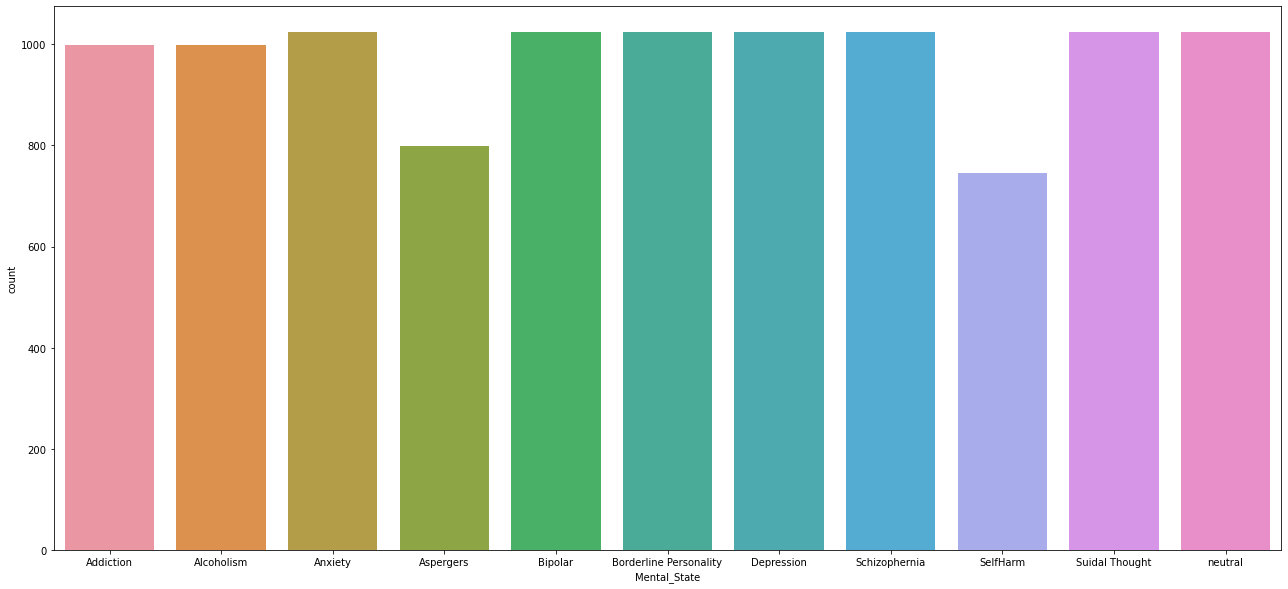

In [18]:
plt.subplots(figsize=(22,10))
sns.countplot(df["Mental_State"])
plt.show()

In [19]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

26163


In [20]:
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup

import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer


In [21]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [22]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on description column
df['Description']=df['Description'].apply(denoise_text)

In [23]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on description column
df['Description']=df['Description'].apply(remove_special_characters)

In [24]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on description column
df['Description']=df['Description'].apply(simple_stemmer)

In [25]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['Description']=df['Description'].apply(remove_stopwords)

{'will', 'do', 'each', 'up', 'be', 'doing', 'didn', 'when', 'this', 'to', 'into', 'after', 'were', 'nor', 'she', 'only', 'does', "didn't", 'more', 'not', 'we', 'couldn', 'other', "aren't", "doesn't", 'aren', "it's", 'haven', 'i', 'my', 'o', 'and', 'an', 'her', 'can', 'during', 'yours', "mustn't", 'out', 'few', 'under', 'y', 've', 'against', 'most', 'doesn', 'there', 'than', 'ours', 'that', 'their', 'having', 'so', 'by', "you'd", "wasn't", 'why', 'the', 'm', 'on', 'wouldn', 'mightn', 'shouldn', 'at', 'ain', "hasn't", 'weren', 'herself', 'above', 'you', 'yourselves', 'any', 'all', 'how', 're', 'should', 'if', 't', "she's", 'had', 'd', 'isn', 'them', 'himself', 'then', 's', 'hadn', "won't", "you've", 'itself', 'same', 'our', "haven't", "that'll", 'where', 'it', 'won', 'he', 'myself', 'no', 'until', 'theirs', 'was', "needn't", 'both', 'hers', 'for', 'very', 'wasn', 'am', "should've", "wouldn't", 'too', "don't", "hadn't", 'who', 'they', 'over', 'through', 'is', 'about', 'did', 'what', 'own'

In [26]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

15023


In [27]:
text = df["Description"]

In [28]:
train_counts = count_vect.fit_transform(text) # converting docs into vectors
train_tfidf  = train_counts 
#train_tfidf = tfidf_transformer.fit_transform(train_counts) # converting transformed vectors into tf-idf vectors
train_tfidf.shape

(10710, 20520)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, df['Mental_State_label'], test_size=0.2, random_state=42)

Y_pre = df['Mental_State']
target_names = list(set(Y_pre))

In [31]:
target_names

['Suidal Thought',
 'Anxiety',
 'Depression',
 'Aspergers',
 'Addiction',
 'Schizophernia',
 'neutral',
 'SelfHarm',
 'Alcoholism',
 'Borderline Personality',
 'Bipolar']

In [32]:
X_train

<8568x20520 sparse matrix of type '<class 'numpy.int64'>'
	with 474347 stored elements in Compressed Sparse Row format>

In [33]:
y_train

4098      4
2517      2
3564      3
2691      2
10853    10
         ..
6099      5
5556      5
5755      5
860       0
8016      7
Name: Mental_State_label, Length: 8568, dtype: int32

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
import seaborn as sn

Test set accuracy 0.6083099906629318
                        precision    recall  f1-score   support

         Schizophernia       0.67      0.82      0.74       205
            Alcoholism       0.74      0.79      0.76       196
Borderline Personality       0.60      0.61      0.61       189
        Suidal Thought       0.81      0.54      0.65       153
             Aspergers       0.64      0.66      0.65       220
              SelfHarm       0.49      0.73      0.59       215
               Anxiety       0.38      0.52      0.44       206
             Addiction       0.69      0.68      0.68       197
            Depression       0.92      0.35      0.51       159
               neutral       0.53      0.64      0.58       197
               Bipolar       0.98      0.27      0.42       205

              accuracy                           0.61      2142
             macro avg       0.68      0.60      0.60      2142
          weighted avg       0.67      0.61      0.60      2142



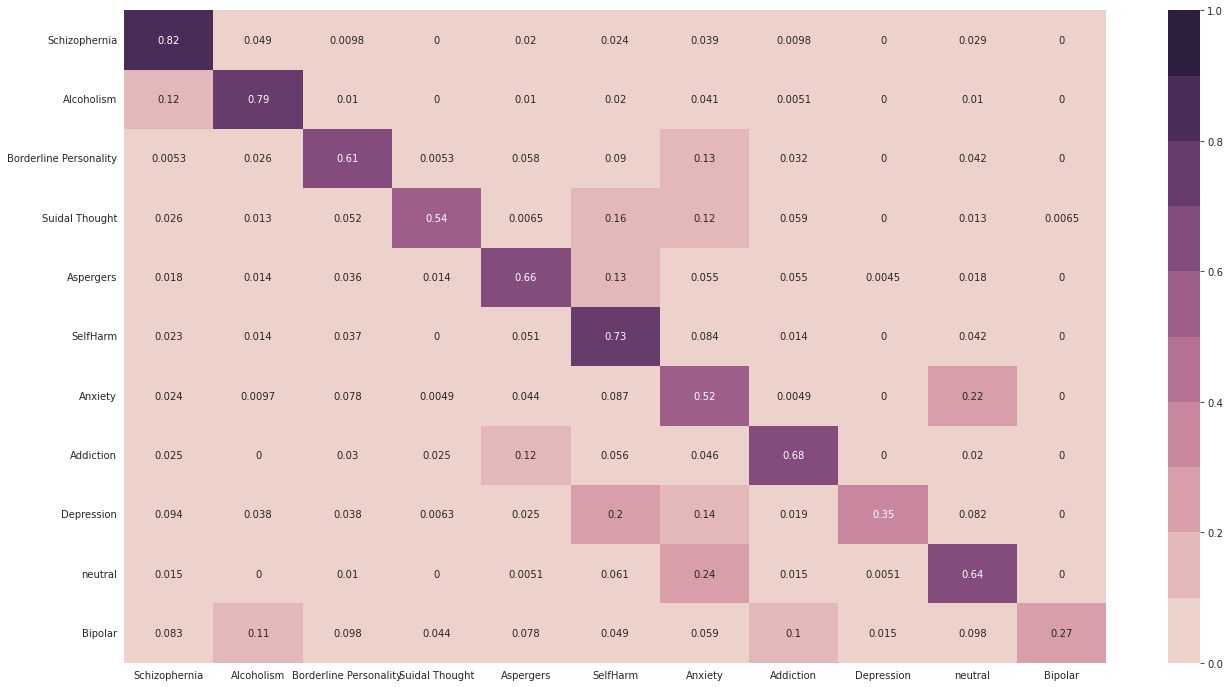

In [38]:
classifer = MultinomialNB()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)


# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [39]:
from sklearn.svm import SVC

Test set accuracy 0.6563958916900093
                        precision    recall  f1-score   support

         Schizophernia       0.70      0.75      0.72       205
            Alcoholism       0.81      0.79      0.80       196
Borderline Personality       0.66      0.72      0.69       189
        Suidal Thought       0.61      0.63      0.62       153
             Aspergers       0.67      0.64      0.65       220
              SelfHarm       0.62      0.63      0.63       215
               Anxiety       0.42      0.40      0.41       206
             Addiction       0.70      0.61      0.65       197
            Depression       0.66      0.64      0.65       159
               neutral       0.51      0.44      0.48       197
               Bipolar       0.80      0.96      0.87       205

              accuracy                           0.66      2142
             macro avg       0.65      0.66      0.65      2142
          weighted avg       0.65      0.66      0.65      2142



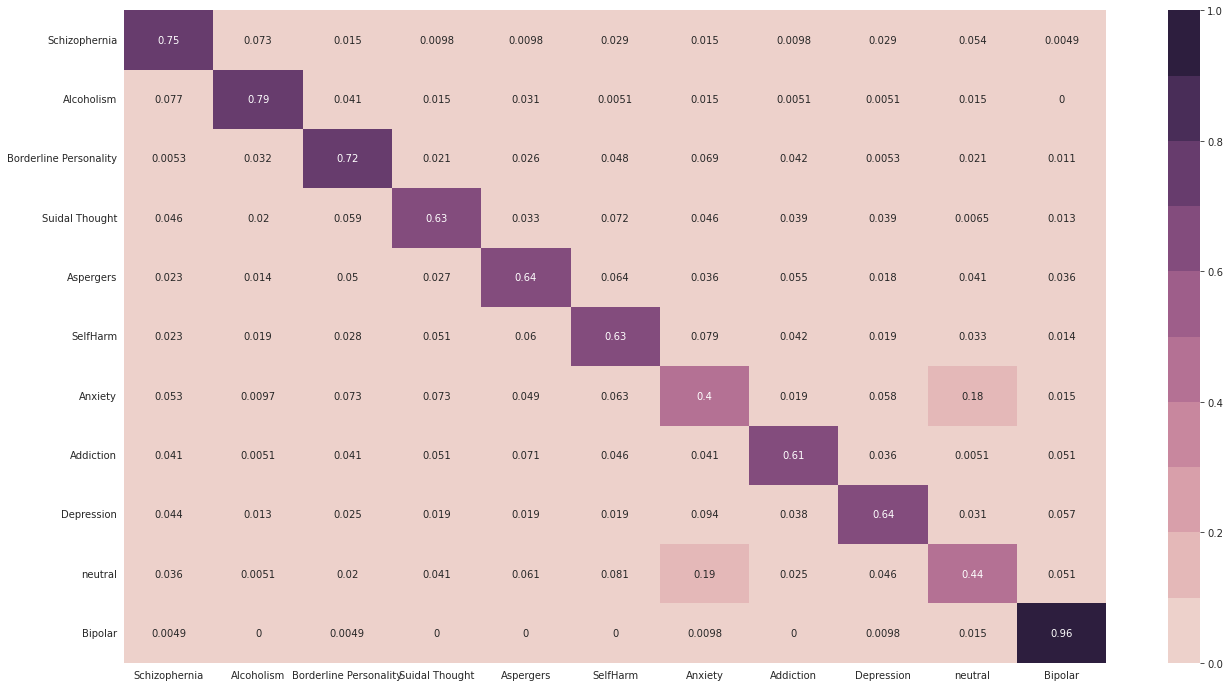

In [40]:
classifer = SVC(kernel='linear')
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [37]:
from xgboost import XGBClassifier

C:\Users\moshi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:41:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test set accuracy 0.719421101774043
                        precision    recall  f1-score   support

        Suidal Thought       0.84      0.75      0.79       205
               Anxiety       0.78      0.87      0.82       196
            Depression       0.73      0.75      0.74       189
             Aspergers       0.78      0.66      0.72       153
             Addiction       0.78      0.69      0.73       220
         Schizophernia       0.75      0.67      0.71       215
               neutral       0.48      0.52      0.50       206
              SelfHarm       0.77      0.75      0.76       197
            Alcoholism       0.76      0.75      0.76       159
Borderline P

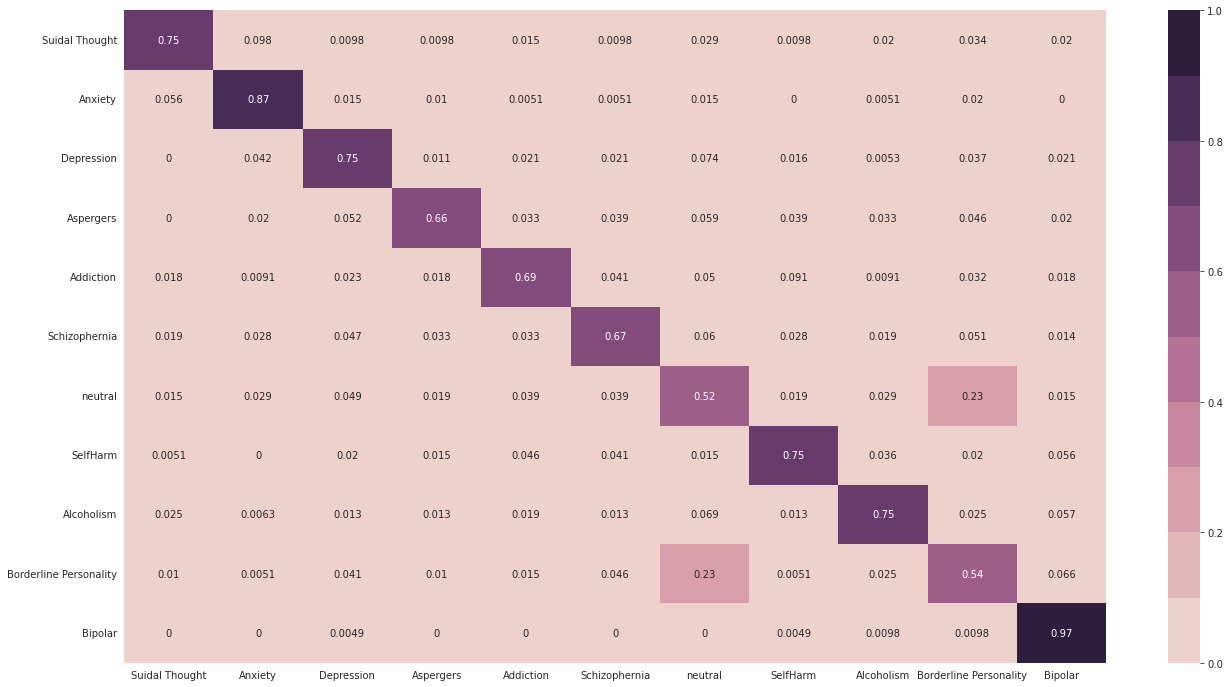

In [38]:
classifer = XGBClassifier()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  


In [43]:
from sklearn.ensemble import AdaBoostClassifier


Test set accuracy 0.6335200746965453
                        precision    recall  f1-score   support

         Schizophernia       0.76      0.69      0.72       205
            Alcoholism       0.77      0.78      0.77       196
Borderline Personality       0.69      0.67      0.68       189
        Suidal Thought       0.70      0.50      0.59       153
             Aspergers       0.76      0.60      0.67       220
              SelfHarm       0.58      0.56      0.57       215
               Anxiety       0.42      0.41      0.41       206
             Addiction       0.66      0.67      0.67       197
            Depression       0.65      0.63      0.64       159
               neutral       0.40      0.53      0.45       197
               Bipolar       0.70      0.91      0.79       205

              accuracy                           0.63      2142
             macro avg       0.64      0.63      0.63      2142
          weighted avg       0.64      0.63      0.63      2142



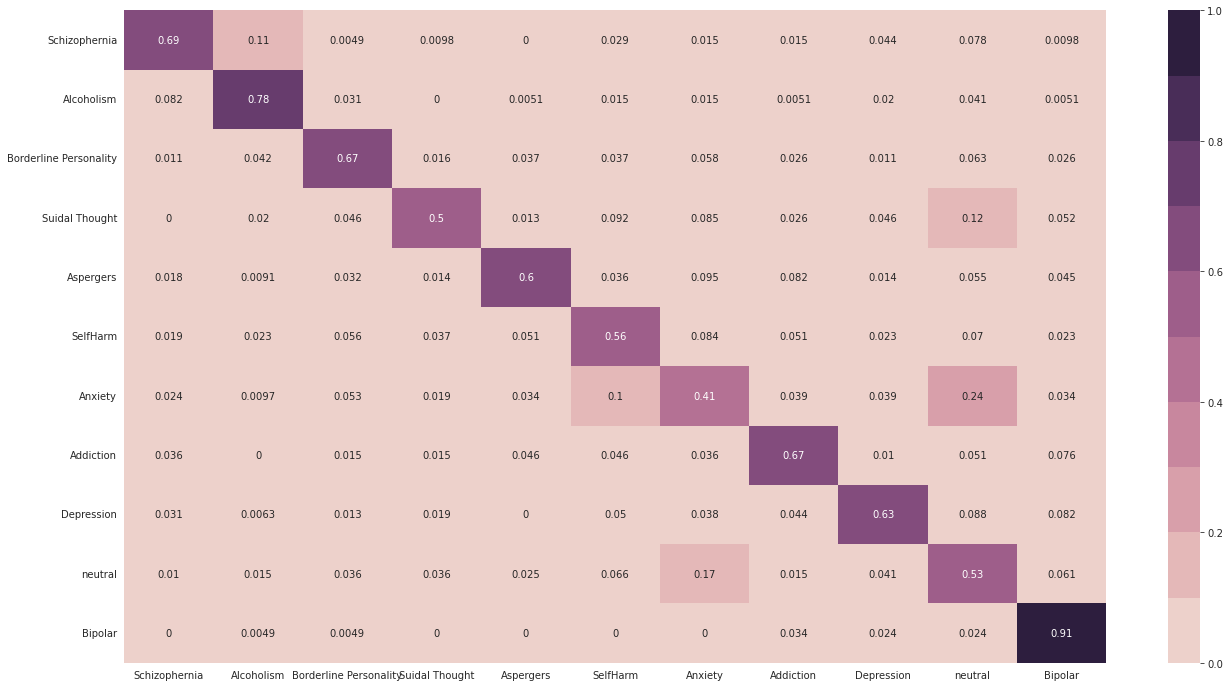

In [44]:
classifer = AdaBoostClassifier(n_estimators=60,
                         learning_rate=1)
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  


In [45]:
from sklearn.tree import DecisionTreeClassifier

Test set accuracy 0.5368814192343604
                        precision    recall  f1-score   support

         Schizophernia       0.63      0.56      0.59       205
            Alcoholism       0.70      0.68      0.69       196
Borderline Personality       0.53      0.58      0.56       189
        Suidal Thought       0.49      0.38      0.43       153
             Aspergers       0.58      0.53      0.56       220
              SelfHarm       0.57      0.56      0.57       215
               Anxiety       0.29      0.32      0.31       206
             Addiction       0.57      0.52      0.54       197
            Depression       0.51      0.50      0.50       159
               neutral       0.31      0.35      0.33       197
               Bipolar       0.72      0.88      0.79       205

              accuracy                           0.54      2142
             macro avg       0.54      0.53      0.53      2142
          weighted avg       0.54      0.54      0.54      2142



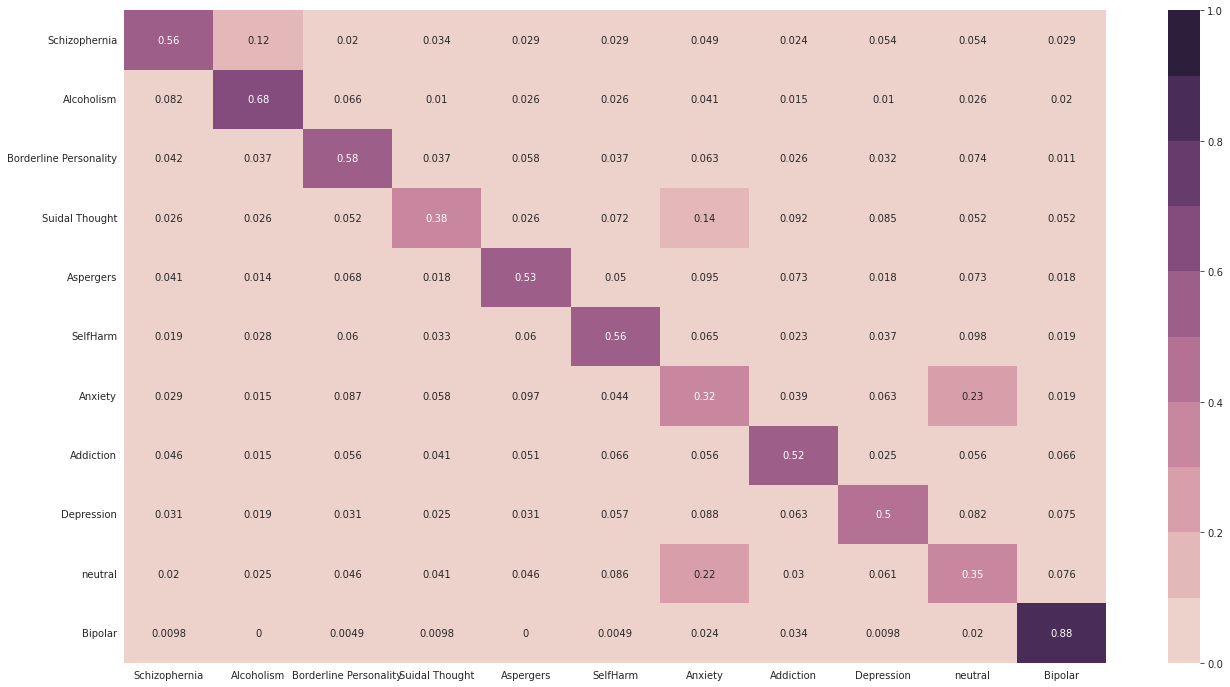

In [46]:
classifer = DecisionTreeClassifier()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  


In [47]:
from sklearn.ensemble import RandomForestClassifier

Test set accuracy 0.6657329598506069
                        precision    recall  f1-score   support

         Schizophernia       0.77      0.70      0.73       205
            Alcoholism       0.76      0.87      0.81       196
Borderline Personality       0.63      0.71      0.67       189
        Suidal Thought       0.91      0.52      0.66       153
             Aspergers       0.79      0.65      0.71       220
              SelfHarm       0.77      0.61      0.68       215
               Anxiety       0.47      0.41      0.44       206
             Addiction       0.78      0.64      0.71       197
            Depression       0.73      0.65      0.69       159
               neutral       0.47      0.53      0.50       197
               Bipolar       0.55      1.00      0.71       205

              accuracy                           0.67      2142
             macro avg       0.69      0.66      0.66      2142
          weighted avg       0.69      0.67      0.66      2142



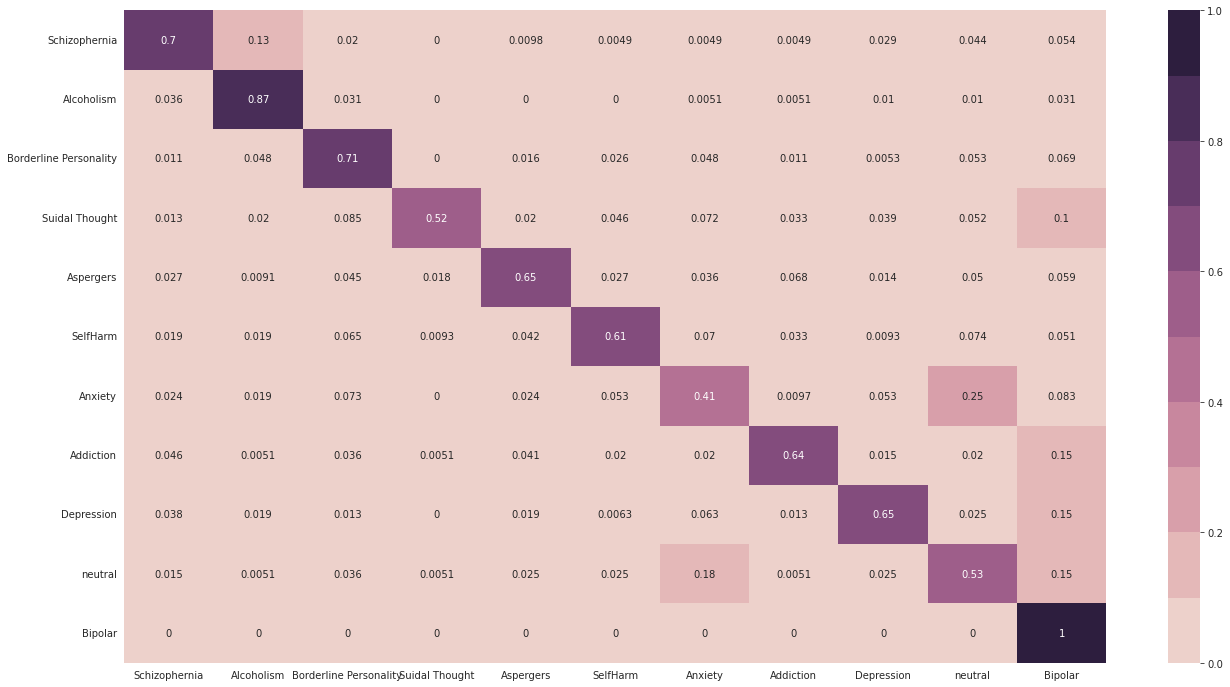

In [48]:
classifer = RandomForestClassifier(n_estimators=100)
shapas = classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [49]:
from sklearn.linear_model import SGDClassifier

Test set accuracy 0.6465919701213819
                        precision    recall  f1-score   support

         Schizophernia       0.76      0.71      0.73       205
            Alcoholism       0.77      0.74      0.76       196
Borderline Personality       0.64      0.62      0.63       189
        Suidal Thought       0.64      0.63      0.64       153
             Aspergers       0.71      0.68      0.69       220
              SelfHarm       0.74      0.64      0.68       215
               Anxiety       0.46      0.32      0.38       206
             Addiction       0.74      0.63      0.68       197
            Depression       0.46      0.72      0.56       159
               neutral       0.47      0.45      0.46       197
               Bipolar       0.70      0.98      0.82       205

              accuracy                           0.65      2142
             macro avg       0.65      0.65      0.64      2142
          weighted avg       0.65      0.65      0.64      2142



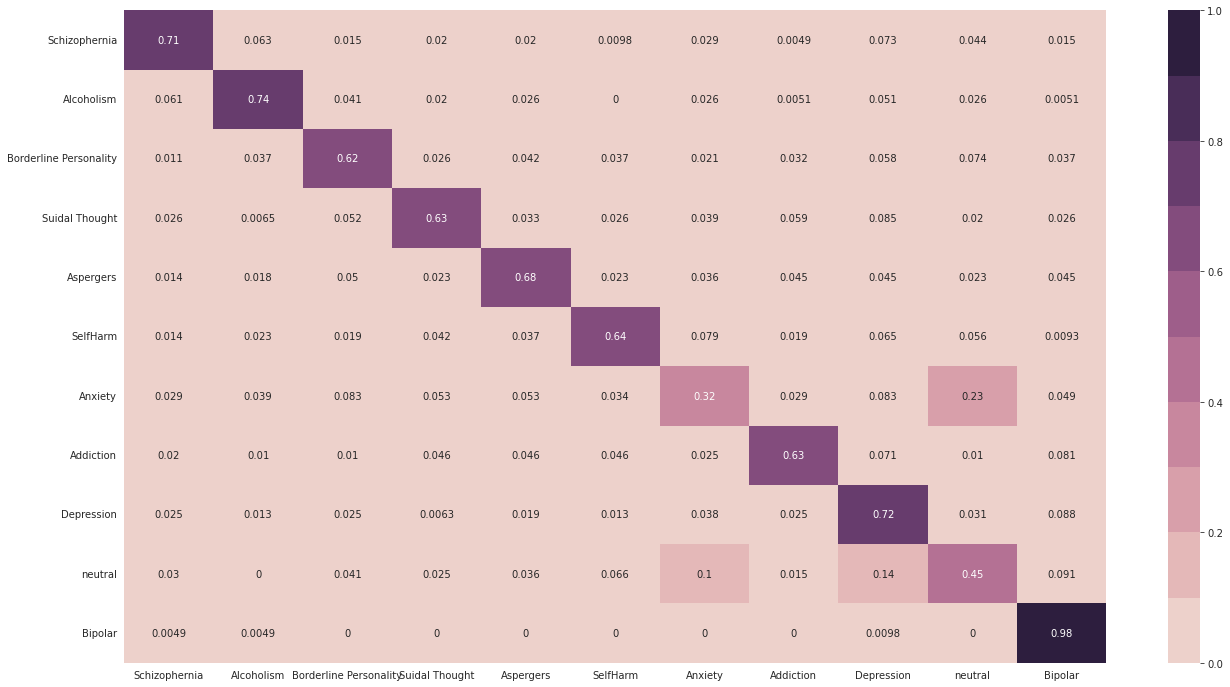

In [50]:
classifer = SGDClassifier()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #


cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [51]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

Test set accuracy 0.2600373482726424
                        precision    recall  f1-score   support

         Schizophernia       0.30      0.19      0.23       205
            Alcoholism       0.43      0.28      0.34       196
Borderline Personality       0.27      0.30      0.28       189
        Suidal Thought       0.33      0.10      0.16       153
             Aspergers       0.39      0.14      0.20       220
              SelfHarm       0.39      0.15      0.22       215
               Anxiety       0.17      0.15      0.16       206
             Addiction       0.39      0.12      0.19       197
            Depression       0.17      0.17      0.17       159
               neutral       0.24      0.23      0.24       197
               Bipolar       0.23      0.99      0.37       205

              accuracy                           0.26      2142
             macro avg       0.30      0.26      0.23      2142
          weighted avg       0.30      0.26      0.23      2142



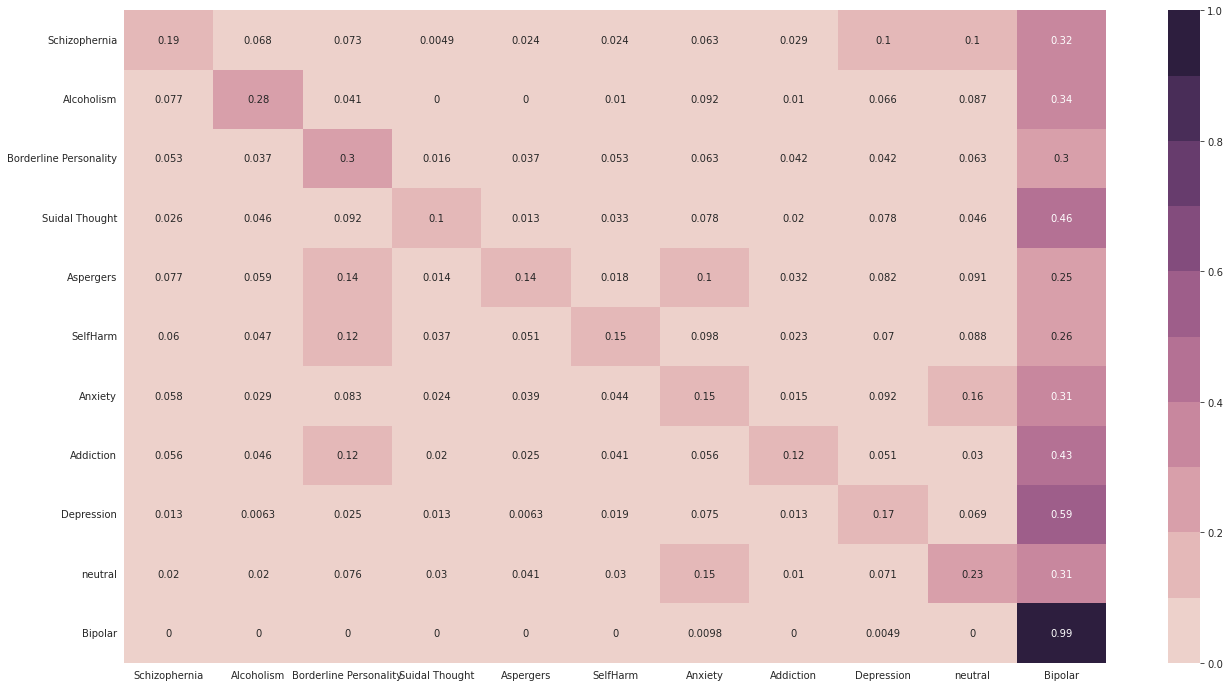

In [52]:
classifer = KNeighborsClassifier(n_neighbors=3)
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [53]:
from sklearn.linear_model import LogisticRegression

C:\Users\moshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test set accuracy 0.6862745098039216
                        precision    recall  f1-score   support

         Schizophernia       0.75      0.75      0.75       205
            Alcoholism       0.79      0.78      0.79       196
Borderline Personality       0.67      0.66      0.67       189
        Suidal Thought       0.70      0.58      0.63       153
             Aspergers       0.74      0.69      0.71       220
              SelfHarm       0.68      0.68      0.68       215
               Anxiety       0.47      0.46      0.47       206
             Addiction       0.70      0.68      0.69       197
            Depression       0.72      0.73      0.72       159
               neutral       0.51      0.53      0.52       197
               Bipolar       0.80      0.98      0.88       205

              accuracy                           0.69      2142
             macro avg       0.69      0.68      0.68      2142
          weighted avg       0.68      0.69      0.68      2142



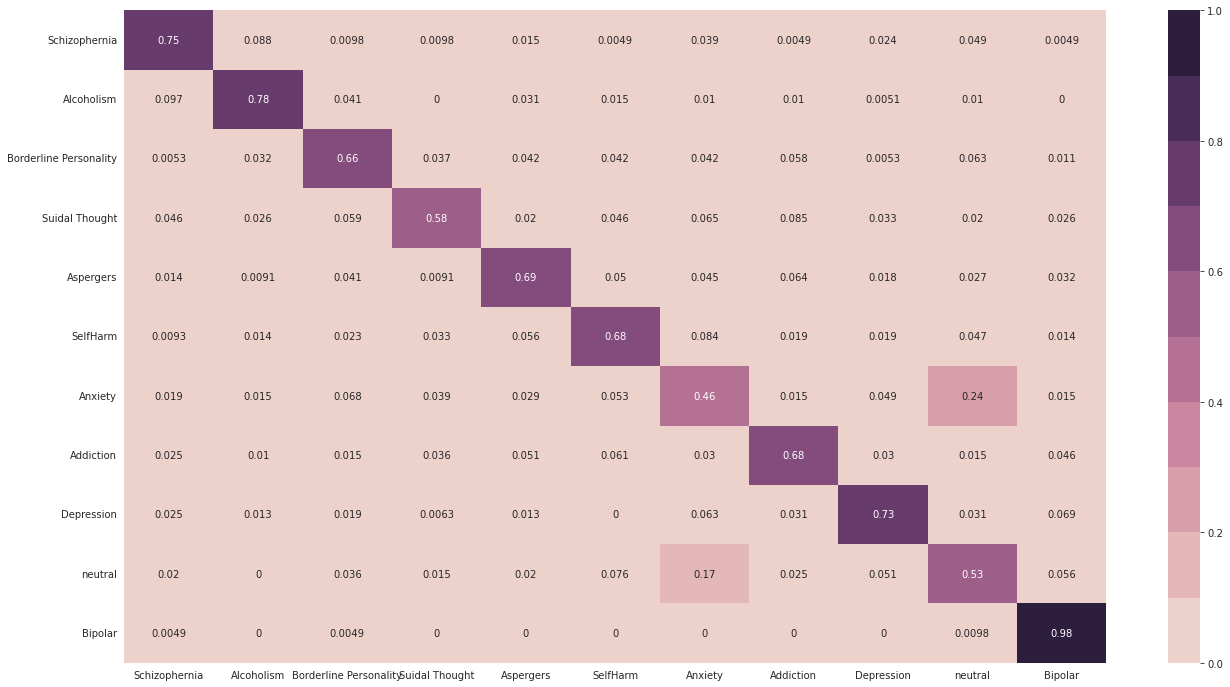

In [54]:
classifer = LogisticRegression()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [55]:
import sklearn_crfsuite
from sklearn_crfsuite import metrics

In [56]:
from sklearn.pipeline import make_pipeline

from lime.lime_text import LimeTextExplainer
class_names = ['Addiction','Alcoholism','Anxiety','Aspergers','Bipolar','Borderline Personality', 'Depression', 'Schizophernia', 'SelfHarm', 'Suidal Thought', 'neutral']
c=make_pipeline(count_vect,classifer)
explainer = LimeTextExplainer(class_names=class_names)



In [57]:
df.Description[:10]

0    im sorri thi post gonna whole lot hand wring m...
1    get super high high amount thc edibl stuff eve...
2    brother shoot heroinmeth past 5 year ran away ...
3    rlli need opinion cuz idk bout thi stuff dont ...
4    ive smoke weed sinc 8th grade middl school hoo...
5    im journal student ontario canada explor harm ...
6    dont care much post thi dont anyon talk someon...
7    im one realli seek support problem thi realli ...
8    realli want need find support system final get...
9    ive lot xanax valium late like lot cant stop i...
Name: Description, dtype: object

In [58]:
#predict
index=10
exp=explainer.explain_instance(df.Description[index],classifier_fn=c.predict_proba,num_features=10)


In [59]:
exp.show_in_notebook(text = True)

In [ ]:
exp = explainer.explain_instance(X_test[idx], c.predict_proba, num_features=6, top_labels=2)
print(exp.available_labels())

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0,:], df.Description[5])

In [ ]:
shap.force_plot(explainer.expected_value, shap_values, X_test)

In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer

In [ ]:
xpl = SmartExplainer(features_dict=house_dict) # Optional parameter

In [ ]:
xpl.compile(
    x=X_test,
    model=classifer
)

In [ ]:
import shap

In [ ]:
# importing SHAP
import shap

# sampling data from the training and test set to reduce time-taken
X_train_sample = shap.sample(X_train, 200)
X_test_sample = shap.sample(X_test, 40)

# creating the KernelExplainer using the logistic regression model and training sample
SHAP_explainer = shap.KernelExplainer(classifer.predict, X_train_sample)
# calculating the shap values of the test sample using the explainer 
shap_vals = SHAP_explainer.shap_values(X_test_sample)

# converting the test samples to a dataframe 
# this is necessary for non-tabular data in order for the visualisations 
# to include feature value
colour_test = pd.DataFrame(X_test_sample.todense())

In [ ]:
shap.summary_plot(shap_vals, colour_test, feature_names=df.get_feature_names())

In [ ]:
shap.force_plot(SHAP_explainer.expected_value, shap_vals[1,:], 
                colour_test.iloc[1,:], feature_names=df.get_feature_names())